## Lasso example

In this notebook we demonstrate the lasso. The data are a collection of 496 proteins, 
presented as the amino acids at each of 100 locations. The response is a measure 
of the resistance of the protein to the HIV virus. The lasso is used as a way to find which 
amino acids have the greatest effect on resistance to HIV.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dat = pd.read_csv('https://raw.githubusercontent.com/YData123/sds365-sp22/main/demos/lasso/hiv.csv', header=None)
dat

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.496508,P,Q,I,T,L,W,Q,R,P,...,M,S,Q,L,G,C,T,L,N,F
1,4.812184,P,Q,I,T,L,W,Q,R,P,...,L,T,Q,L,G,C,T,L,N,F
2,3.295837,P,Q,I,T,L,W,Q,R,P,...,L,T,Q,L,G,C,T,L,N,F
3,4.828314,P,Q,I,T,L,W,Q,R,P,...,M,T,Q,I,G,C,T,L,N,F
4,4.867534,P,Q,I,T,L,W,Q,R,P,...,M,T,Q,I,G,C,T,L,N,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,4.836282,P,Q,I,T,L,W,Q,R,P,...,M,T,Q,L,G,C,T,L,N,F
492,4.787492,P,Q,I,T,L,W,Q,R,P,...,L,T,Q,I,G,C,T,L,N,F
493,5.030438,P,Q,I,T,L,W,Q,R,P,...,L,T,Q,L,G,C,T,L,N,F
494,4.700480,P,Q,I,T,L,W,Q,R,P,...,L,T,Q,I,G,C,T,L,N,F


Dimension of data: 496 proteins by 99 positions

Amino acids:
{'R', 'P', 'Q', 'M', 'G', 'Z', 'K', 'V', 'E', 'D', 'L', 'F', 'C', 'W', 'N', 'S', 'H', 'T', 'A', 'Y', 'I'}


Text(0.5, 1.0, 'distribution of HIV resistance')

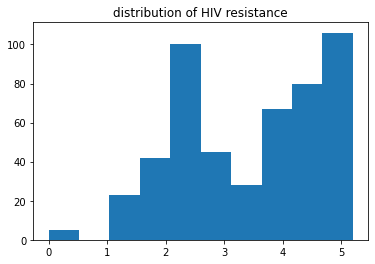

In [3]:
y = np.array(dat)[:,0]
x = np.array(dat)[:,1:]

print('Dimension of data: %d proteins by %d positions' % (x.shape[0], x.shape[1]))
amino = set(x.flatten())
print('\nAmino acids:')
print(amino)

plt.hist(y)
plt.title('distribution of HIV resistance')

Compute the set of amino acids used at each position

In [4]:
[set(x[:,i]) for i in np.arange(x.shape[1])]

[{'P'},
 {'Q', 'V'},
 {'I', 'V'},
 {'A', 'D', 'P', 'S', 'T'},
 {'L'},
 {'W'},
 {'Q'},
 {'Q', 'R'},
 {'P'},
 {'F', 'H', 'I', 'L', 'M', 'R', 'V', 'Y'},
 {'I', 'L', 'V'},
 {'A', 'E', 'I', 'K', 'N', 'P', 'R', 'S', 'T', 'Z'},
 {'I', 'L', 'V'},
 {'K', 'R', 'T', 'Z'},
 {'I', 'L', 'V'},
 {'A', 'E', 'G', 'Z'},
 {'E', 'G'},
 {'H', 'I', 'Q', 'Z'},
 {'I', 'L', 'P', 'Q', 'R', 'T', 'V', 'Z'},
 {'I', 'K', 'M', 'R', 'T', 'V'},
 {'E', 'Q'},
 {'A', 'V'},
 {'I', 'L'},
 {'F', 'I', 'L'},
 {'D'},
 {'T'},
 {'G'},
 {'A'},
 {'D'},
 {'D', 'N'},
 {'T'},
 {'I', 'V'},
 {'F', 'I', 'L', 'M', 'V'},
 {'D', 'E', 'K', 'N', 'Q', 'T', 'Z'},
 {'D', 'E', 'N'},
 {'I', 'L', 'M', 'V'},
 {'A', 'C', 'D', 'E', 'H', 'N', 'S', 'T', 'Y', 'Z'},
 {'L', 'V'},
 {'P', 'Q', 'S'},
 {'G'},
 {'I', 'K', 'P', 'R'},
 {'W'},
 {'K', 'R', 'T'},
 {'P'},
 {'K', 'L', 'N', 'Q', 'R', 'V'},
 {'I', 'L', 'M', 'V'},
 {'I', 'V'},
 {'G', 'M', 'S', 'V'},
 {'G'},
 {'I', 'L', 'V'},
 {'G'},
 {'G'},
 {'F', 'I', 'L'},
 {'A', 'I', 'L', 'M', 'S', 'T', 'V'},
 {'K', '

We see that some columns are constant. We remove them.

In [5]:

num_acids = np.array([len(set(x[:,i])) for i in np.arange(x.shape[1])])
x = x[:,num_acids > 1]


Next, we convert to binary matrix, with 1 indicating the amino acid in that position 
is the most common one among all the proteins in the data, and 0 otherwise.

In [6]:


from collections import Counter

n, p = x.shape
X = np.zeros(n*p).reshape(n, p)
for j in np.arange(p):
    acids = Counter(x[:,j])
    letter = acids.most_common(1)[0][0]
    X[:,j] = X[:,j] + (x[:,j] == letter)



Text(0.5, 1.0, 'Binary form of data matrix')

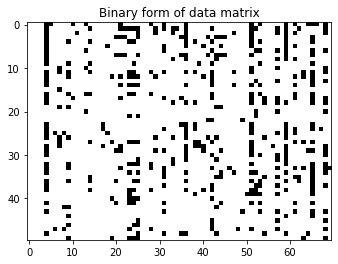

In [7]:
plt.imshow(X[0:50,:], cmap='gray')
plt.title('Binary form of data matrix')

Subtract off the mean of the response, and standarize the columns.

In [8]:
y = y - np.mean(y)
Xs = (X - np.mean(X, axis=0))/ np.std(X, axis=0)


Run the lasso for $\lambda = 0.1$. (Since Python reserves `lambda` for lambda expressions, 
the regularization is called `alpha`.)

In [9]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.1)
lasso.fit(Xs, y)
lasso.coef_

array([ 0.        ,  0.        ,  0.        ,  0.        , -0.21322983,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.29170087, -0.        , -0.        ,  0.11010339,
       -0.        , -0.12858796, -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.08518888,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.01138982,  0.        , -0.01666672, -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.17484762,
        0.        , -0.09197632, -0.        , -0.17418615,  0.        ,
       -0.19287851,  0.        ,  0.        , -0.        , -0.  

Now, we compute the regularization paths, varying $\lambda$ ($\alpha$) from zero to one, 
and plotting the resulting coefficient for each of the variables. When $\lambda$ is large, most of the coefficients will be zero; when $\lambda$ is small, we get closer the the least squares solution, and most of the coefficients will be non-zero.

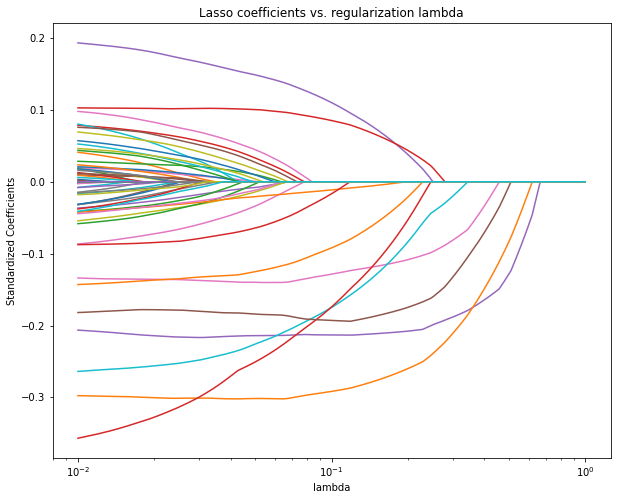

In [10]:
alphas = np.linspace(0.01,1,10000)
lasso = Lasso() 
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xs, y)
    coefs.append(lasso.coef_)

plt.figure(figsize=(10,8))    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients vs. regularization lambda');
#plt.savefig('hiv-lasso-paths.pdf', bbox_inches='tight')

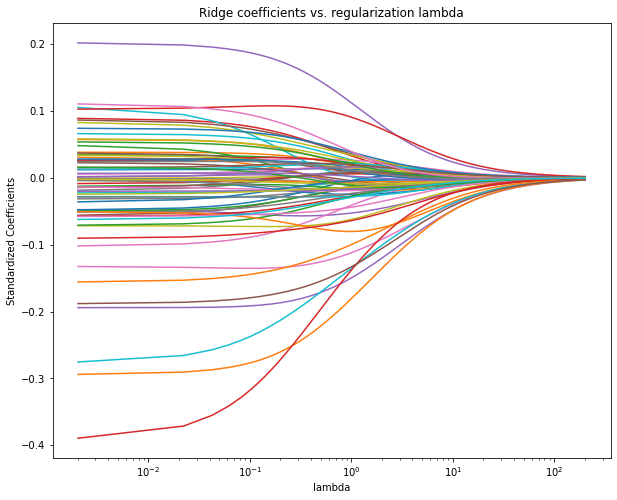

In [11]:
from sklearn.linear_model import Ridge
alphas = np.linspace(1,100000,10000)
ridge = Ridge() 
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(Xs, y)
    coefs.append(ridge.coef_)

plt.figure(figsize=(10,8))    
ax = plt.gca()
ax.plot(alphas/Xs.shape[0], coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients vs. regularization lambda');
#plt.savefig('hiv-ridge-paths.pdf', bbox_inches='tight')